In [263]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import scipy as cp
from scipy.special import logsumexp, softmax

5


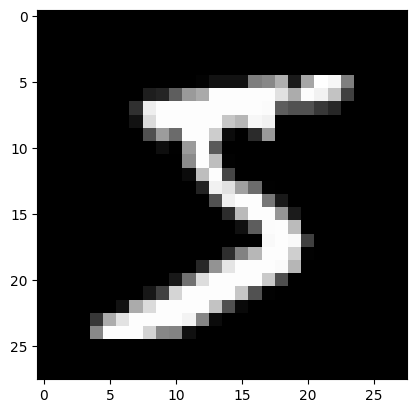

In [264]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

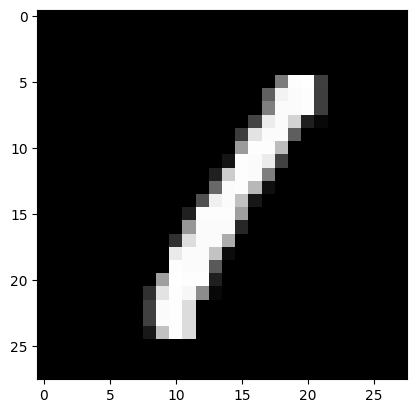

In [265]:
plt.imshow(x_train[3,:].reshape(28,28), cmap='gray')

In [266]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [267]:
# untrained model
logits = model(x_train, training=True)
np.argmax(logits, 1)[0:100]

array([1, 1, 9, 1, 1, 1, 4, 1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [268]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [269]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2.407761

In [270]:
answer = np.argmax(logits, 1)
np.mean(answer == y_train[samples_for_evaluation])

0.071

In [275]:
# Stochastic gradient algorithm

class multinomial_logisitic_regression():
    def __init__(
        self,
        high: int = 28,
        width: int = 28,
        bias: list = True,
        lr : float = 2e-2,
        alpha: float = 5e-1,
        nb_classes : int = 9,

    ) -> None:
        # assert isinstance(hidden_sizes, list)
        # super().__init__()
        self.width = width
        self.high = high
        self.bias = bias
        self.lr = lr
        self.alpha = alpha
        self.nb_classes = nb_classes
        self.bias_weight = np.zeros((self.nb_classes, 1))
        # self.decoder = FullyConnectedMLP(n_latent, hidden_sizes, n_out)

    def initialize_weights(self):
        self.weights = np.array((self.nb_classes, self.high * self.width))
        if self.bias == True:
            self.bias_weight = np.zeros((self.nb_classes, 1))
            self.weights = np.ones((self.high * self.width + self.bias, self.nb_classes)) / 1#0 #np.ones((self.nb_classes, self.high * self.width + self.bias)) / 10
        return self.weights

    def F(self, x_batch, y_batch, weights = None, bias_weight = None):
        if weights is None:
            weights = self.weights
        if bias_weight is None:
            bias_weight = self.bias_weight

        # weights = weights.reshape((self.nb_classes, self.width * self.high,))
        # weights_extracted = np.hstack((bias_weight, weights))
        # weights_extracted = weights.reshape((self.nb_classes, self.width * self.high,))
        x_batch_extracted = np.hstack((np.ones((x_batch.shape[0],1)), x_batch))
        linear_prediction = x_batch_extracted @ weights # (batch_size, number_of_classes)
        first_term = logsumexp(linear_prediction, axis = -1)
        # print(f'y_batch = {y_batch}')

        # print(f'first_term = {first_term}')
        # print(f'linear_prediction = {linear_prediction}')
        second_term = y_batch @ linear_prediction.T #np.sum(y_batch * linear_prediction, axis=0)
        average = np.mean(first_term - second_term)
        # print(f'second_term = {second_term}')
        squared_norm = (weights[:,0:] ** 2).sum() # Not sure if we sould include the bias!!!!!!!!!!!!!!!!!!!!!!!!!
        # print(f'squared_norm = {squared_norm}')
        # print(f'average = {average}')
        # print(f'self.alpha = {self.alpha}')
        return average + self.alpha * squared_norm / 2

    def compute_gradient(self, x_batch, y_batch, weights = None, bias_weight = None):
        if weights is None:
            weights = self.weights
        if bias_weight is None:
            bias_weight = self.bias_weight

        # weights = weights.reshape((self.nb_classes, self.width * self.high,))
        # weights_extracted = np.hstack((bias_weight, weights))
        # weights_extracted = weights.reshape((self.nb_classes, self.width * self.high,))
        x_batch_extracted = np.hstack((np.ones((x_batch.shape[0],1)), x_batch))
        linear_prediction = x_batch_extracted @ weights
        first_term = x_batch_extracted.T @ softmax(linear_prediction, axis = -1) / len(y_batch)
        second_term = x_batch_extracted.T @ y_batch
        # print(f'first_term = {first_term}')
        # print(f'second_term = {second_term}')
        return first_term - second_term + self.alpha * weights

    def gradient_descent_step(self, x_batch, y_batch, lr = None, max_iter = 1, tol = 1e-4): # don't change params! Performs one step of simple GD
        """
        x_batch - of shape (batch_size, dimensionality)
        y_batch - of shape (batch_size, number_of_classes)

        returns: new weights after one step of gradient descent, shape is (dimensionality, number_of_classes)
        """
        if lr is None:
            lr = self.lr
        w_old = self.weights
        for i in range(max_iter):
            gradient = self.compute_gradient(x_batch, y_batch, weights = w_old)
            w_new = w_old - lr * gradient
            if np.sum(np.abs(w_new - w_old)) < tol:
                break
            w_old = w_new
            # print(self.F(x_batch, y_batch, weights = w_old))
        return w_new

    def SGD(self, x_train, y_train, x_test = None, y_test = None, lr = None, max_iter = 200, batch_size = 1):
        """
        x_train - of shape (batch_size, dimensionality)
        y_train - of shape (batch_size, number_of_classes)

        performs max_iter steps of SGD with batch_size; updates self.weights online

        !!!!!!!!Constant learning rate!!!!!!!!!!!!

        returns: new weights after one step of gradient descent, shape is (dimensionality, number_of_classes)
        """
        batch_idx = np.random.randint(0, len(y_train), batch_size)
        x_batch, y_batch = x_train[batch_idx, :], y_train[batch_idx, :]
        for i in range(max_iter):
            batch_idx = np.random.randint(0, len(y_train), batch_size)
            x_batch, y_batch = x_train[batch_idx, :], y_train[batch_idx, :]
            w_new = self.gradient_descent_step(x_batch, y_batch, lr)
            self.weights = w_new

    def SGD_with_plotting(self, x_train, y_train, x_test, y_test, lr = None, max_iter = 200, batch_size = 1):
        """
        x_train - of shape (batch_size, dimensionality)
        y_train - of shape (batch_size, number_of_classes)

        performs max_iter steps of SGD with batch_size; updates self.weights online; prints the plot of F(test)

        !!!!!!!!Constant learning rate!!!!!!!!!!!!

        returns: new weights after one step of gradient descent, shape is (dimensionality, number_of_classes)
        """

        batch_idx = np.random.randint(0, len(y_train), batch_size)
        x_batch, y_batch = x_train[batch_idx, :], y_train[batch_idx, :]
        objective_scores = []
        for i in range(max_iter):
            batch_idx = np.random.randint(0, len(y_train), batch_size)
            x_batch, y_batch = x_train[batch_idx, :], y_train[batch_idx, :]
            w_new = self.gradient_descent_step(x_batch, y_batch, lr)
            self.weights = w_new
            print(self.F(x_test, y_test))
            objective_scores.append(self.F(x_test, y_test))
        plt.plot(objective_scores)

    def compute_loss(self, x, y):
        x_extracted = np.hstack((np.ones((x.shape[0],1)), x))
        linear_prediction = x_extracted @ self.weights
        logits = linear_prediction
        answer = np.argmax(logits, 1)
        return np.mean(answer == y)
    def predict(self, x):
        x_extracted = np.hstack((np.ones((x.shape[0],1)), x))
        linear_prediction = x_extracted @ self.weights
        logits = linear_prediction
        answer = np.argmax(logits, 1)
        return answer

In [276]:
y_train_for_model = np.zeros((len(y_train), 10))
y_test_for_model = np.zeros((len(y_test), 10))

y_train_for_model[np.arange(y_train.size), y_train] = 1
y_test_for_model[np.arange(y_test.size), y_test] = 1

# y_train[:5]
# y_train_for_model[:5]

In [277]:
model = multinomial_logisitic_regression(28,28, True, 2e-1,5e-1,10)
model.initialize_weights()
model.F(x_test[:100, :], y_test_for_model[:100])

1964.8025850929941

In [278]:
model.compute_loss(x_test[:100, :], y_test[:100])

0.08

1945.2334670068735
1925.8704822786067
1906.6836757589565
1887.7099878760246
1868.9397593785263
1850.3262148036806
1831.8926090253094
1813.6264827326602
1795.543899370815
1777.6601537947713
1759.9311334275433
1742.3912855055596
1725.0525352553102
1707.8750326391423
1690.9020992663488
1674.0603204505137
1657.3667544805119
1640.864518106192
1624.5246164560822
1608.3672265304178
1592.3288109503003
1576.4869820751533
1560.7741628061292
1545.2127967067595
1529.8040128990922
1514.567988495191
1499.4838203107804
1484.5390282979677
1469.7728848991214
1455.1183925749817
1440.6445788661517
1426.3124276620872
1412.1147366895032
1398.0422060846552
1384.1418445943302
1370.381238824658
1356.7608046603334
1343.24680988758
1329.863506201059
1316.6203850074685
1303.5192370086713
1290.573219022635
1277.7791096728183
1265.034352743188
1252.4118565589406
1239.9341902793774
1227.5864764030346
1215.3593875200484
1203.259127736944
1191.2831701509394
1179.4301653934906
1167.7148318884213
1156.1012786861177
114

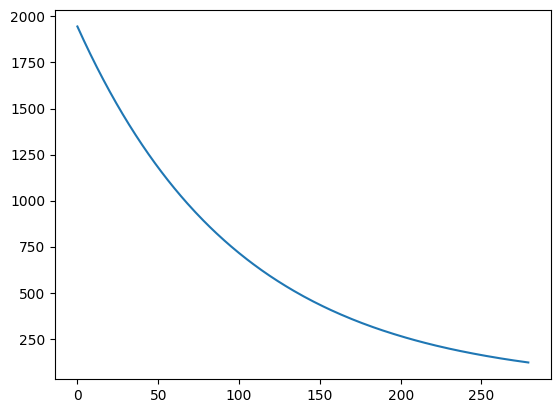

In [279]:
model.SGD_with_plotting(x_train, y_train_for_model, x_test[:100, :], y_test_for_model[:100, :], lr = 1e-2, max_iter = 280, batch_size = 1 )

In [280]:
model.F(x_test[:100, :], y_test_for_model[:100])

121.36512380924019

In [281]:
model.compute_loss(x_test[:100, :], y_test[:100])

0.72

In [282]:
model.predict(x_test[:10,:])

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])

In [283]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

prediction of the model is 4
correct answer is 5


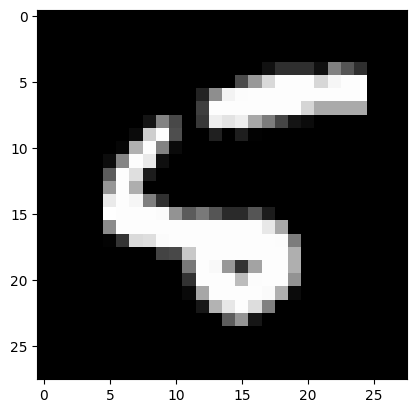

In [284]:
i = 8
print(f'prediction of the model is {model.predict(x_test[i:i+2,:])[0]}')
print(f'correct answer is {y_test[i]}')
plt.imshow(test_data[0][i], cmap='gray')